In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


## Content based recommendation system works on tags(labels) finding similarity between labels , tags or labels are formed using various features that provide info about movie conntent

In [2]:
movies = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')

In [3]:
movies.shape

(4803, 20)

In [4]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
movies.describe(include='all')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


In [8]:
#most movies are of genre drama

In [9]:
len(movies)

4803

In [10]:
def cal():
    p=0
    l=0
    for i in range(len(movies)):
        if(movies.iloc[i].budget>=movies.iloc[i].revenue):
            l+=1
        else:
            p+=1
    L = [p, l]
    return L
    

In [11]:
pl=cal()

In [12]:
import matplotlib.pyplot as plt

In [13]:
label = ['profit', 'loss']

[]

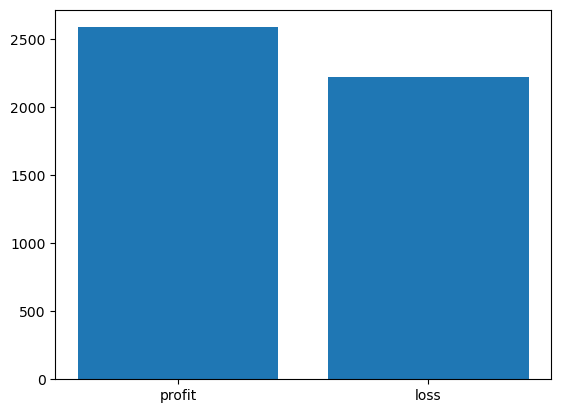

In [14]:
plt.bar(label, pl)
plt.plot()

In [15]:
te = pd.to_datetime(movies.release_date)

In [16]:
type(te)

pandas.core.series.Series

In [17]:
type(movies['release_date'])

pandas.core.series.Series

[]

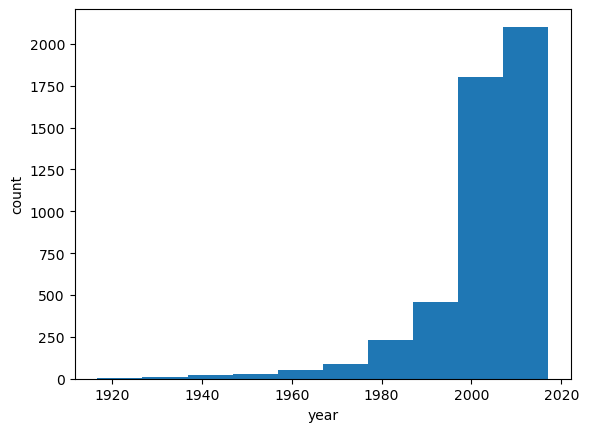

In [18]:
plt.hist(te)
plt.xlabel('year')
plt.ylabel('count')
plt.plot()

[]

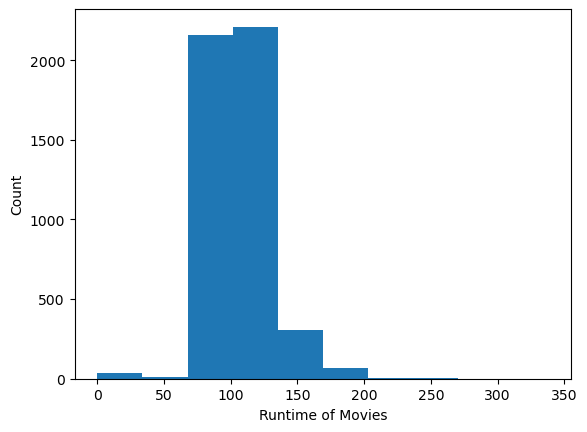

In [19]:
plt.hist(movies.runtime)
plt.xlabel('Runtime of Movies')
plt.ylabel('Count')
plt.plot()

In [20]:
movies['runtime'].mean()

106.87585919600083

In [21]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [22]:
movies.iloc[1].genres# therefore id 12 is adventure, 14 is fantasy

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [23]:
movies['keywords'].head(1).values

array(['[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'],
      dtype=object)

In [24]:
movies.production_companies.head(1).values

array(['[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'],
      dtype=object)

<Axes: >

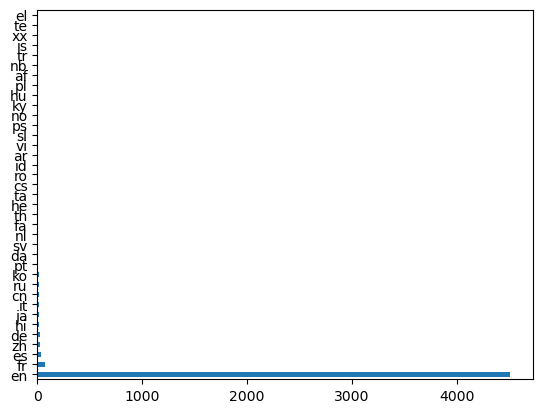

In [27]:
movies.original_language.value_counts().plot(kind='barh')

In [26]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [28]:
credits.shape

(4803, 4)

In [29]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

keywords-description using keywords,
production_contries-shoot location,
status-upcoming or released,
title-title in english,
original_title - any language(local)

In [30]:
#creating copies of movies dataframe just to test somethings ahead
test1movies = movies.copy()

In [31]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [32]:
credits.head(1).cast.values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

id- id assigned ,
cast_id - id assigned in cast,
credit_id - id based on contribution?mostly an invalid column based on values (just an assumption)

In [33]:
data = credits['cast']

In [34]:
data[1:20].head(1)

1    [{"cast_id": 4, "character": "Captain Jack Spa...
Name: cast, dtype: object

movies and credits are merged based on a column

In [35]:
movies.duplicated().value_counts()

False    4803
dtype: int64

In [36]:
credits.duplicated().sum()

0

In [37]:
movies.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [38]:
credits.isna().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [39]:
movies.shape

(4803, 20)

In [40]:
credits.shape

(4803, 4)

In [41]:
# movies.merge(credits,on='title').shape

In [42]:
# movies=movies.merge(credits,on='movie_id')
movies=movies.merge(credits,on='title')


In [43]:
movies.shape

(4809, 23)

### why more rows when inner join is by default? 

In [44]:
#let's use the copied dataframe to verify

In [45]:
test1movies['title'].unique

<bound method Series.unique of 0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object>

In [46]:
test1movies.index

RangeIndex(start=0, stop=4803, step=1)

In [47]:
credits['title'].unique

<bound method Series.unique of 0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object>

In [48]:
credits.index

RangeIndex(start=0, stop=4803, step=1)

In [49]:
#merged
movies.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4799, 4800, 4801, 4802, 4803, 4804, 4805, 4806, 4807, 4808],
           dtype='int64', length=4809)

In [50]:
movies.isna().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

In [51]:
movies.duplicated().sum()

0

In [52]:
movies.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4799, 4800, 4801, 4802, 4803, 4804, 4805, 4806, 4807, 4808],
           dtype='int64', length=4809)

In [53]:
movies.reset_index(drop=True)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"":

In [54]:
movies.shape

(4809, 23)

### please leave solution for this problem in comments

In [55]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [56]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [57]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [58]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [59]:
movies.release_date.head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

### Understanding the content of movies that are specific to a movie and we compare with other movies to identify similarity ;
### whereas populaity, budget are not specific about content of movies
### columns to consider
* budget - all high budget movies are not liked
* genres - useful to recommend similar columns(yes)
* homepage - not useful
* id - to fetch images in website(yes)
* keywords - of that movies useful to recommend(yes)
* original_language - not useful as data is imbalanced see below
* original_title - remove to avoid confusion between differnt languages
* overview - useful in comparing summary(yes)
* production_companies - can be used or not, so test by including and not including
* production_contries - not useful
* release_date - time period may be included, test by including and not including
* revenue - may be factor can be test with including and not including
* runtime - irrelavent for recommendation               
* spoken_languages - irrelavent for recommendation 
* status - irrelavent for recommendation
* tagline - will be confusing may not indicate about content of the movie
* title - include(yes)(sequels)
* vote_average - not useful
* vote_count - not useful  
* movie_id - id already included 
* cast - recommendation on cast(yes) 
* crew - useful (director based content) (yes)     
Genrally, Numerical attributes are not considered for content based recommendation 
note try to include release date because old movies may be liked on their different content

<Axes: >

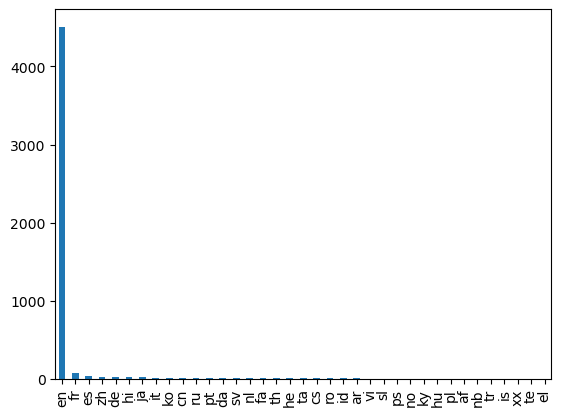

In [60]:
movies.original_language.value_counts().plot(kind='bar')

In [61]:
# movies.original_language.value_counts()

In [62]:
# movies.original_language.sum()

In [63]:
movies.isna().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

In [64]:
# movies.isna().value_counts()

In [65]:
movies1 = movies[['id','title','genres','keywords','overview','cast','crew']]

In [66]:
movies1.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [67]:
movies1.shape

(4809, 7)

#### movie_id and title are important to search movies,transform to a new dataframe with id,title,tags columns.
#### Tags is created merging columns other than movie_id and title.
#### Here data pre-processing is required as some of the data is in json format.

# Data Preprocessing

In [68]:
movies1.isna().sum()
#column-wise

id          0
title       0
genres      0
keywords    0
overview    3
cast        0
crew        0
dtype: int64

In [69]:
movies1.duplicated().sum()

0

In [70]:
movies1.isnull().sum()

id          0
title       0
genres      0
keywords    0
overview    3
cast        0
crew        0
dtype: int64

In [71]:
movies1.isna().value_counts()
#output-wise

id     title  genres  keywords  overview  cast   crew 
False  False  False   False     False     False  False    4806
                                True      False  False       3
dtype: int64

In [72]:
movies1.duplicated().value_counts()

False    4809
dtype: int64

##### since only 3 values of overview are missing, drop 

In [73]:
movies1.dropna(inplace=True)

/tmp/ipykernel_32/1868617496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies1.dropna(inplace=True)


In [74]:
movies1.isna().sum()

id          0
title       0
genres      0
keywords    0
overview    0
cast        0
crew        0
dtype: int64

In [75]:
movies1.index.values

array([   0,    1,    2, ..., 4806, 4807, 4808])

In [76]:
movies1 = movies1.reset_index(drop=True) # after dropping 3 missing values index will be changed use reset_index to have sequential numbering 
# here drop=True means to drop original indexing

In [77]:
movies1.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [78]:
movies1.index.values

array([   0,    1,    2, ..., 4803, 4804, 4805])

In [79]:
test1movies.iloc[2656].overview # this is previously copied dataframe

nan

In [80]:
movies1.overview.head(1).values

array(['In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'],
      dtype=object)

### Tags column is created by combining required data of all the columns 

### 1)Now in movies1 dataframe we go over genres of each movies and extract "name" values and get a list of genres then add it to overview
##### execute the cell only once

#### convert individual columns then combine with overview

In [81]:
movies1.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [82]:
type(movies1.iloc[0].genres)

str

In [83]:
movies1.genres.head(1).values

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'],
      dtype=object)

In [84]:
type(movies1.genres.head(1))

pandas.core.series.Series

In [85]:
movies1.genres.head(1).values

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'],
      dtype=object)

In [86]:
#dataset->row->col 
movies1.head(1).genres.values#array string(list(dictionary)) object o/p

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'],
      dtype=object)

In [87]:
movies1.iloc[0].genres#string o/p
#o/p is string->list of dictionaries

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [88]:
movies1.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [89]:
def test(obj):
    L = []
    for i in obj:
        L.append(i["name"])
    return L

In [90]:
# test(movies.iloc[0].genres) this line gives error

#### Here we have list in the form if string not list itself, hence we need integer indices to access.
#### Library ast has a method literal_eval() that converts the string to list safely as compared to eval()

In [91]:
import ast

In [92]:
tu = ast.literal_eval('"hello","wow"')

In [93]:
type(tu)

tuple

In [94]:
an = ast.literal_eval("[1,2]")

In [95]:
type(an)

list

In [97]:
ans = ast.literal_eval("[1,2],(3,4)")

In [98]:
ans

([1, 2], (3, 4))

In [99]:
type(ans)

tuple

In [100]:
#for movies1.iloc[0].genres
ast.literal_eval(movies1.iloc[0].genres)#we got a list from string

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

### literal_eval() evaluates string expressions and returns data structures and  is safe compared to eval()

In [101]:
def convertion(obj):
    L = []
    for i in ast.literal_eval(obj):# for each dictionary in the list 
#         print(i)
        L.append(i['name'])
    return L

### iloc[rowindex, columnsindex],  loc[rowlabel, columnlabel]

In [102]:
movies1.head(10)

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",The seemingly invincible Spider-Man goes up ag...,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",When the kingdom's most wanted-and most charmi...,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",When Tony Stark tries to jumpstart a dormant p...,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...","As Harry begins his sixth year at Hogwarts, he...","[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",Fearing the actions of a god-like Super Hero l...,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


In [103]:
movies1.iloc[[2, 5],[1, 3, 6]]#fancy indexing

,title,keywords,crew
2,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
5,Spider-Man 3,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."


### apply() method allows to apply user defined functions to each row or column

#### df['col'].apply(fun_name, args=[])
#
#### along axis=0 each row in a column
#### df.apply(fun, axis=0)# returns a new row
#
#### along axis=1 for each col in a row
#### df.apply(fun,axis=1)
#### returns a new column summarizing each row

In [104]:
movies1['genres'] = movies1['genres'].apply(convertion)

In [105]:
len(movies1)

4806

In [106]:
# ast.literal_eval(movies1.iloc[0].genres) #gives list of dictionaries, removes outermost string

In [107]:
movies1.head(1)

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [108]:
movies1.iloc[0].genres

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

### 2)let's do this for keywords column since we need 'name' 

In [109]:
movies1.iloc[0].keywords
#name gives info about content of movies  
#since it is also in string form we use ast.literal_eval()

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [110]:
ast.literal_eval(movies1.iloc[0].keywords)

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [111]:
movies1.keywords=movies1.keywords.apply(convertion)

In [112]:
movies1.head(1)

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### 3) Moving on to next attribute which is cast, for simplicity we select top 3 cast members

In [113]:
movies1.iloc[0].cast

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [114]:
# convert to list using ast then have a count variable set to 3 for top 3 cast members

In [115]:
def convert3(obj):
    L = []
    count=3
    for item in ast.literal_eval(obj):#each item is a dictionary 3 items are needed
        if(count>0):
            L.append(item['name'])
        count-=1 
    return L
        

In [116]:
print(convert3(movies1.iloc[0].cast))


['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']


In [117]:
ast.literal_eval(movies1.iloc[0].cast)

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [118]:
movies1.cast=movies1.cast.apply(convert3)

In [119]:
movies1.head(1)

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [120]:
movies1.iloc[0].crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

### 4)From crew only director is extracted, we need director name 
example "job": "Director", "name": "James Cameron"

In [121]:
def crewconvert(obj):
    L = []
    for item in ast.literal_eval(obj):
        if item['job']=="Director":
            L.append(item["name"])
            break #since each movie has only one director
    return L

In [122]:
print(crewconvert(movies1.iloc[0].crew))

['James Cameron']


In [123]:
movies1.crew = movies1.crew.apply(crewconvert)

In [124]:
movies1.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [125]:
type(movies1.overview)

pandas.core.series.Series

In [126]:
type(movies1.overview[0])

str

In [127]:
# def helper(obj):
    

In [128]:
#Since all other columns are list type, convert string overview to list 
movies1['overview'] = movies1['overview'].apply(lambda x: x.split())

In [129]:
movies1.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [132]:
# spaces between words has to be removed
# there are two actors chris pratt, chris evans
# chris, pratt, evans all becomes separate tags but when we search chris pratt movies since we may ge recommended with chris evans because 
# first name is similar and we are using similarity measures between movies to recommend 
# Hence remove spaces for the columns genres, keywords, cast, crew

In [135]:
def helper(obj):
    L = []
    for i in obj:
#         print(i)
        L.append(i.replace(" ",""))
#         print(i.replace(" ",""))
      
    return L
    
    

In [136]:
st = 'Chris Pratt'
st.replace(" ","")

'ChrisPratt'

In [137]:
# test
teee = ['Chris Pratt','Chris Evans']
teee = helper(teee)

In [138]:
teee

['ChrisPratt', 'ChrisEvans']

In [139]:
movies1.genres = movies1.genres.apply(helper)

In [140]:
movies1.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [142]:
movies1.keywords = movies1.keywords.apply(helper)
movies1.cast = movies1.cast.apply(helper)
movies1.crew = movies1.crew.apply(helper)

In [144]:
movies1.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [145]:
# Finally make a new column tags by combining genres, cast, crew, keywords

In [146]:
movies1['tags'] = movies1.overview +  movies1.genres + movies1.keywords + movies1.cast + movies1.crew

In [147]:
movies1.head()

,id,title,genres,keywords,overview,cast,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [148]:
movies1.shape

(4806, 8)

In [149]:
movies1.reset_index(drop=True)

,id,title,genres,keywords,overview,cast,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...
4801,9367,El Mariachi,"[Action, Crime, Thriller]","[unitedstates–mexicobarrier, legs, arms, paper...","[El, Mariachi, just, wants, to, play, his, gui...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez],"[El, Mariachi, just, wants, to, play, his, gui..."
4802,72766,Newlyweds,"[Comedy, Romance]",[],"[A, newlywed, couple's, honeymoon, is, upended...","[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns],"[A, newlywed, couple's, honeymoon, is, upended..."
4803,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TVMovie]","[date, loveatfirstsight, narration, investigat...","[""Signed,, Sealed,, Delivered"", introduces, a,...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith],"[""Signed,, Sealed,, Delivered"", introduces, a,..."
4804,126186,Shanghai Calling,[],[],"[When, ambitious, New, York, attorney, Sam, is...","[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia],"[When, ambitious, New, York, attorney, Sam, is..."


In [150]:
movies1.shape

(4806, 8)

In [151]:
final_df = movies1[['id', 'title', 'tags']]

In [152]:
final_df.head()

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [153]:
type(final_df.tags[0])
#convert to string

list

In [154]:
final_df['tags'] = final_df['tags'].apply(lambda x: " ".join(x))

/tmp/ipykernel_32/1852633529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['tags'] = final_df['tags'].apply(lambda x: " ".join(x))


In [155]:
final_df.head()

,id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [156]:
type(final_df.tags[0])

str

In [157]:
final_df.tags[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [158]:
final_df['tags'] = final_df.tags.apply(lambda x: x.lower())

/tmp/ipykernel_32/142061302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['tags'] = final_df.tags.apply(lambda x: x.lower())


In [159]:
final_df.tags[0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

#### 1)To find similarity we need data in numerical form, hence we convert text to numerical form using vectorization
#### 2)Consider a 2D space and two movies with 2 numerical coordinates we can find similarity between these movies(euclidian, cosine etc), similary  for any of the 4806 movies we can get nearest 5 movies and recommend 
#### 3)There are few methods for vectorization such as a)Bag of Words b)tf-idf c)word2vec
#### 4)I will be using Bag of Words :
   #### ...i)combine all tags and form a large paragraph; extract 5000 or 10000 most frequent words
   #### ...ii)Now, For each movie tag: count how many times the most freqeunt words have appeared
   #### ...iii)for example: if first most frequent word is "adventure", count how times adventure appears in each movie's tags, similary second most frequent. 
   ### Example
   #### frequent_words->.adventure(word1).|.action(word2).|.word3.|.word4|........................................|.word5000
   #### ....movie1(tags).........5........|......2........|..3..............................................................
   #### ....movie2(tags).........2........|......0........|..0..............................................................
   
  #### Each row is called as a vector, for each movie a vector can be obtained
  #### These vectors are plotted in 5000dimension since there 5000 frequent words and for a movie searched we can get nearest 5 movies to recommend
#### source:https://www.youtube.com/watch?v=1xtrIEwY_zY&t=2105s
#
### Note : stop words will not be considered for vectorization
#### -> Stop words are common words that add no value to the meaning of the text, that is they are used for sentence formation but don't contribute anything to overall meaning or content of the text ,EXAMPLE: 'that','the','in' other articles, prepositions, pronouns etc these don't help in identifying similar movies.

In [160]:
from sklearn.feature_extraction.text import CountVectorizer

In [162]:
cv = CountVectorizer(max_features=5000, stop_words='english')

In [164]:
v = cv.fit_transform(final_df['tags'])

In [167]:
v

<4806x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 133902 stored elements in Compressed Sparse Row format>

A sparse matrix is a type of matrix in which most of its elements are zero. In contrast, a dense matrix is one where a significant proportion of its elements are non-zero
Sparse matrices offer advantages in terms of memory efficiency and computational speed when dealing with such matrices, as they allow you to store only the non-zero elements and their corresponding indices.
Compressed Sparse Row (CSR) Format: In this format, the non-zero elements are stored along with their row indices and column pointers. It efficiently compresses the row-wise structure of the matrix.


In [168]:
print(v)# (row indices, column indices)   data

  (0, 726)	1
  (0, 2778)	2
  (0, 1273)	1
  (0, 2985)	1
  (0, 4698)	1
  (0, 2952)	1
  (0, 4555)	1
  (0, 1718)	1
  (0, 3198)	1
  (0, 3514)	1
  (0, 155)	2
  (0, 831)	1
  (0, 71)	1
  (0, 105)	1
  (0, 1609)	1
  (0, 3915)	1
  (0, 1064)	1
  (0, 1793)	1
  (0, 4145)	1
  (0, 4183)	1
  (0, 1794)	1
  (0, 3802)	1
  (0, 4177)	1
  (0, 4620)	1
  (0, 4150)	1
  :	:
  (4805, 3173)	1
  (4805, 4638)	1
  (4805, 27)	1
  (4805, 4130)	1
  (4805, 3151)	1
  (4805, 1327)	1
  (4805, 566)	2
  (4805, 2631)	1
  (4805, 1567)	1
  (4805, 3487)	1
  (4805, 3946)	1
  (4805, 1108)	1
  (4805, 585)	1
  (4805, 1330)	1
  (4805, 1672)	1
  (4805, 1786)	1
  (4805, 311)	1
  (4805, 1150)	1
  (4805, 1056)	2
  (4805, 308)	1
  (4805, 2356)	1
  (4805, 1288)	1
  (4805, 1329)	2
  (4805, 1886)	1
  (4805, 638)	1


In [172]:
vectors = v.toarray()

In [173]:
vectors.shape

(4806, 5000)

In [175]:
vectors[0] # for avatar

array([0, 0, 0, ..., 0, 0, 0])

In [178]:
list(cv.get_feature_names_out())

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '18th',
 '19',
 '1930s',
 '1940s',
 '1950',
 '1950s',
 '1960s',
 '1970s',
 '1980',
 '1980s',
 '1985',
 '1990s',
 '1999',
 '19th',
 '19thcentury',
 '20',
 '200',
 '2009',
 '20th',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '60s',
 '70',
 '70s',
 'aaron',
 'aaroneckhart',
 'abandoned',
 'abducted',
 'abigailbreslin',
 'abilities',
 'ability',
 'able',
 'aboard',
 'abuse',
 'abusive',
 'academy',
 'accept',
 'accepted',
 'accepts',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'accompanied',
 'accomplish',
 'account',
 'accountant',
 'accused',
 'ace',
 'achieve',
 'act',
 'acting',
 'action',
 'actionhero',
 'actions',
 'activist',
 'activities',
 'activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'adam',
 'adams',
 'adamsandler',
 'adamshankman',
 'adaptation',
 'adapted',
 'addict',
 'addicted',
 'addiction',
 'adolescence',
 'adolescent'

 ('action',
 'actions',)
 ('activities',
 'activity',)
 ('actor',
 'actors',)
 these pairs are similar hence they add unnecessary complexity
hence we apply stemming i.e converting each word to it's root word it is suffix removal
it may give words that have no meaning 

In [190]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [191]:
ps.stem('walking')

'walk'

In [192]:
ps.stem("walked")

'walk'

In [193]:
ps.stem('actioned')

'action'

In [194]:
def ste(text):
    st = []
    for word in text.split():#string to list iterable
        st.append(ps.stem(word))
    
    return " ".join(st)# back to string
        

In [200]:
final_df['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [205]:
ste(final_df['tags'][0])# converted string "uniqu" has no meaning

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [206]:
final_df['tags'] = final_df['tags'].apply(ste)

/tmp/ipykernel_32/3956990690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['tags'] = final_df['tags'].apply(ste)


In [207]:
final_df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

convert to vectors

In [208]:
v2 = cv.fit_transform(final_df['tags'])

In [209]:
v2

<4806x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 145403 stored elements in Compressed Sparse Row format>

In [213]:
v2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [215]:
list(cv.get_feature_names_out())

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1985',
 '1990',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult'

every word is in it's base/root form

In [216]:
vectors1 = v2.toarray()

In [217]:
vectors1.shape

(4806, 5000)

### we have vectors for all 4806movies 
### find similarity between a movie with each other movies, 4806x4806 matrix
### considering similarity over distance for computational ease, similarity inversely proportional to distance , 
### why euclidean distance is not a reliable measure ??? what is curse of dimensionality

In [218]:
from sklearn.metrics.pairwise import cosine_similarity

In [219]:
similarity = cosine_similarity(vectors1)

In [220]:
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [221]:
similarity.shape

(4806, 4806)

### inorder to get top 5 similar movies for a movie similarity should be in descending order, but on sorting we lose index of a movie with which similarity was calculated 

In [229]:
list(enumerate(similarity[0])) # to not lose id of which movie being referred, enumerate is used, for 1st movie similarity with itself is 1

[(0, 1.0000000000000002),
 (1, 0.08346223261119858),
 (2, 0.08603090020146065),
 (3, 0.0734718358370645),
 (4, 0.1892994097121204),
 (5, 0.10838874619051501),
 (6, 0.04024218182927669),
 (7, 0.14673479641335554),
 (8, 0.05923488777590923),
 (9, 0.0967301666813349),
 (10, 0.10259783520851541),
 (11, 0.09464970485606021),
 (12, 0.09037128496931669),
 (13, 0.04499212706658476),
 (14, 0.12824729401064427),
 (15, 0.06282808624375433),
 (16, 0.07894736842105264),
 (17, 0.13977653617040256),
 (18, 0.09493290614465533),
 (19, 0.0830812984794528),
 (20, 0.058038100008800934),
 (21, 0.10968169942141635),
 (22, 0.0662266178532522),
 (23, 0.08740748201220976),
 (24, 0.0533380747062665),
 (25, 0.05101627678885769),
 (26, 0.15389675281277312),
 (27, 0.18693292157876878),
 (28, 0.116543309349613),
 (29, 0.065033247714309),
 (30, 0.06684847767323797),
 (31, 0.15907119074394446),
 (32, 0.08520286456846099),
 (33, 0.09733285267845754),
 (34, 0.0),
 (35, 0.09933992677987831),
 (36, 0.17316974359835272),


In [233]:
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x:x[1])

[(0, 1.0000000000000002),
 (1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574),
 (582, 0.24511108480187255),
 (1204, 0.24455799402225922),
 (1194, 0.2367785320221084),
 (61, 0.23179316248638276),
 (778, 0.23174488732966075),
 (4048, 0.2278389747471728),
 (1920, 0.2252817784447915),
 (2786, 0.21853668936906193),
 (172, 0.21239769762143662),
 (972, 0.2108663315950723),
 (322, 0.2105263157894737),
 (2333, 0.20443988269091456),
 (3608, 0.20437977982832192),
 (260, 0.20395079136182276),
 (151, 0.2029530274475215),
 (4192, 0.2029530274475215),
 (1444, 0.20277677641345318),
 (74, 0.2024645717996314),
 (1089, 0.2020475485519274),
 (3675, 0.1979082783981174),
 (973, 0.19767387315371682),
 (577, 0.1976738731537168),
 (47, 0.19672236884115843),
 (2971, 0.19252140716412977),
 (942, 0.19134594929397597),
 (495, 0.19088542889273336),
 (1201, 0.19088542889273336),
 (305, 0.19007487139298027),
 (4, 0.18929940971

In [235]:
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x:x[1])[1:6] #top 5 movies similar to Avatar

[(1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

In [251]:
# to get index of requested movie example batman begins
# final_df[final_df['title']=='Batman']
final_df.duplicated().value_counts()

False    4806
dtype: int64

In [254]:
final_df[final_df['title']=='Batman Begins'].index[0]

119

In [269]:
def recommendation1(movie):
    movie_index = final_df[final_df['title']==movie].index[0]
    return  movie_index

In [270]:
recommendation1('Batman Begins')

119

In [271]:
def recommendation2(movie):
    movie_index = final_df[final_df['title']==movie].index[0]
    list_movies = sorted(list(enumerate(similarity[movie_index])), reverse=True, key = lambda x: x[1])[1:6]
    return list_movies

In [272]:
recommendation2('Batman Begins')

[(65, 0.40218090755486674),
 (1363, 0.35434169344615046),
 (1362, 0.3340765523905305),
 (3, 0.3177444546511212),
 (3297, 0.3120099844792576)]

In [273]:
def recommendation(movie):
    movie_index = final_df[final_df['title']==movie].index[0]
    list_movies = sorted(list(enumerate(similarity[movie_index])), reverse=True, key = lambda x: x[1])[1:6]
    
    for i in list_movies:#in list_movies first attribute is index of similar movie
        print(final_df['title'].iloc[i[0]])
        

In [274]:
recommendation('Batman Begins')

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


In [275]:
recommendation('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


In [278]:
recommendation('Titanic')

The Notebook
Under the Same Moon
Ghost Ship
The Bounty
Pirates of the Caribbean: On Stranger Tides


In [281]:
recommendation('Superman')

Superman Returns
Superman II
Iron Man 2
Superman III
Superman IV: The Quest for Peace


In [282]:
recommendation('The Shawshank Redemption')

Prison
Penitentiary
Buffalo '66
The Truman Show
Flying By


In [284]:
recommendation('Pirates of the Caribbean: On Stranger Tides')

Pirates of the Caribbean: Dead Man's Chest
The Pirates! In an Adventure with Scientists!
Moby Dick
All Is Lost
Pirates of the Caribbean: The Curse of the Black Pearl
